# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
pd.read_csv('bank-full.csv')


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [3]:
data = pd.read_csv('bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [6]:
#EDA
data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['month'] = data['month'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')
data['y'] = data['y'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [8]:
def fn(x):
    data[x] = data[x].replace('unknown',0)
    
    
fn('job')
fn('education')
fn('contact')
fn('poutcome')

data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
0                 288
Name: job, dtype: int64

In [9]:
def fn(y):
    data[y] = data[y].replace('blue-collar',1)
    data[y] = data[y].replace('management',2)
    data[y] = data[y].replace('technician',3)
    data[y] = data[y].replace('admin.',4)
    data[y] = data[y].replace('services',5)
    data[y] = data[y].replace('retired',6)
    data[y] = data[y].replace('self-employed',7)
    data[y] = data[y].replace('entrepreneur',8)
    data[y] = data[y].replace('unemployed',9)
    data[y] = data[y].replace('housemaid',10)
    data[y] = data[y].replace('student',11)
    
fn('job')
data['job'].value_counts()
    

1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: job, dtype: int64

In [10]:
def fn(i):
    data[i] = data[i].replace('married',1)
    data[i] = data[i].replace('single',2)
    data[i] = data[i].replace('divorced',3)
    
fn('marital')
data['marital'].value_counts()
    

1    27214
2    12790
3     5207
Name: marital, dtype: int64

In [11]:
def fn(k):
    data[k] = data[k].replace('secondary',1)
    data[k] = data[k].replace('tertiary',2)
    data[k] = data[k].replace('primary',3)
    
fn('education')
data['education'].value_counts()

1    23202
2    13301
3     6851
0     1857
Name: education, dtype: int64

In [12]:
def fn(f):
    data[f] = data[f].replace('no',1)
    data[f] = data[f].replace('yes',2)
    
fn('default')
data['default'].value_counts()

1    44396
2      815
Name: default, dtype: int64

In [13]:
def fn(m):
    data[m] = data[m].replace('no',1)
    data[m] = data[m].replace('yes',2)
    
fn('housing')
data['housing'].value_counts()

2    25130
1    20081
Name: housing, dtype: int64

In [14]:
def fn(p):
    data[p] = data[p].replace('no',1)
    data[p] = data[p].replace('yes',2)
    
fn('loan')
data['loan'].value_counts()

1    37967
2     7244
Name: loan, dtype: int64

In [15]:
def fn(r):
    data[r] = data[r].replace('cellular',1)
    data[r] = data[r].replace('telephone',2)
    
fn('contact')
data['contact'].value_counts()

1    29285
0    13020
2     2906
Name: contact, dtype: int64

In [16]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [17]:
def fn(a):
    data[a] = data[a].replace('jan',1)
    data[a] = data[a].replace('feb',2)
    data[a] = data[a].replace('mar',3)
    data[a] = data[a].replace('apr',4)
    data[a] = data[a].replace('may',5)
    data[a] = data[a].replace('jun',6)
    data[a] = data[a].replace('jul',7)
    data[a] = data[a].replace('aug',8)
    data[a] = data[a].replace('sep',9)
    data[a] = data[a].replace('oct',10)
    data[a] = data[a].replace('nov',11)
    data[a] = data[a].replace('dec',12)
    
fn('month')
data['month'].value_counts()
    
    

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

In [18]:
data['poutcome'].value_counts()

0          36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [19]:
def fn(g):
    data[g] = data[g].replace('failure',1)
    data[g] = data[g].replace('success',2)
    data[g] = data[g].replace('other',3)
    
fn('poutcome')
data['poutcome'].value_counts()

0    36959
1     4901
3     1840
2     1511
Name: poutcome, dtype: int64

In [20]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [21]:
def fn(n):
    data[n] = data[n].replace('no',0)
    data[n] = data[n].replace('yes',1)
    
fn('y')
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [22]:
data['job'] = pd.to_numeric(data['job'],errors='coerce')
data['marital'] = pd.to_numeric(data['marital'],errors='coerce')
data['education'] = pd.to_numeric(data['education'],errors='coerce')
data['default'] = pd.to_numeric(data['default'],errors='coerce')
data['housing'] = pd.to_numeric(data['housing'],errors='coerce')
data['loan'] = pd.to_numeric(data['loan'],errors='coerce')
data['contact'] = pd.to_numeric(data['contact'],errors='coerce')
data['month'] = pd.to_numeric(data['month'],errors='coerce')
data['poutcome'] = pd.to_numeric(data['poutcome'],errors='coerce')
data['y'] = pd.to_numeric(data['y'],errors='coerce')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [24]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

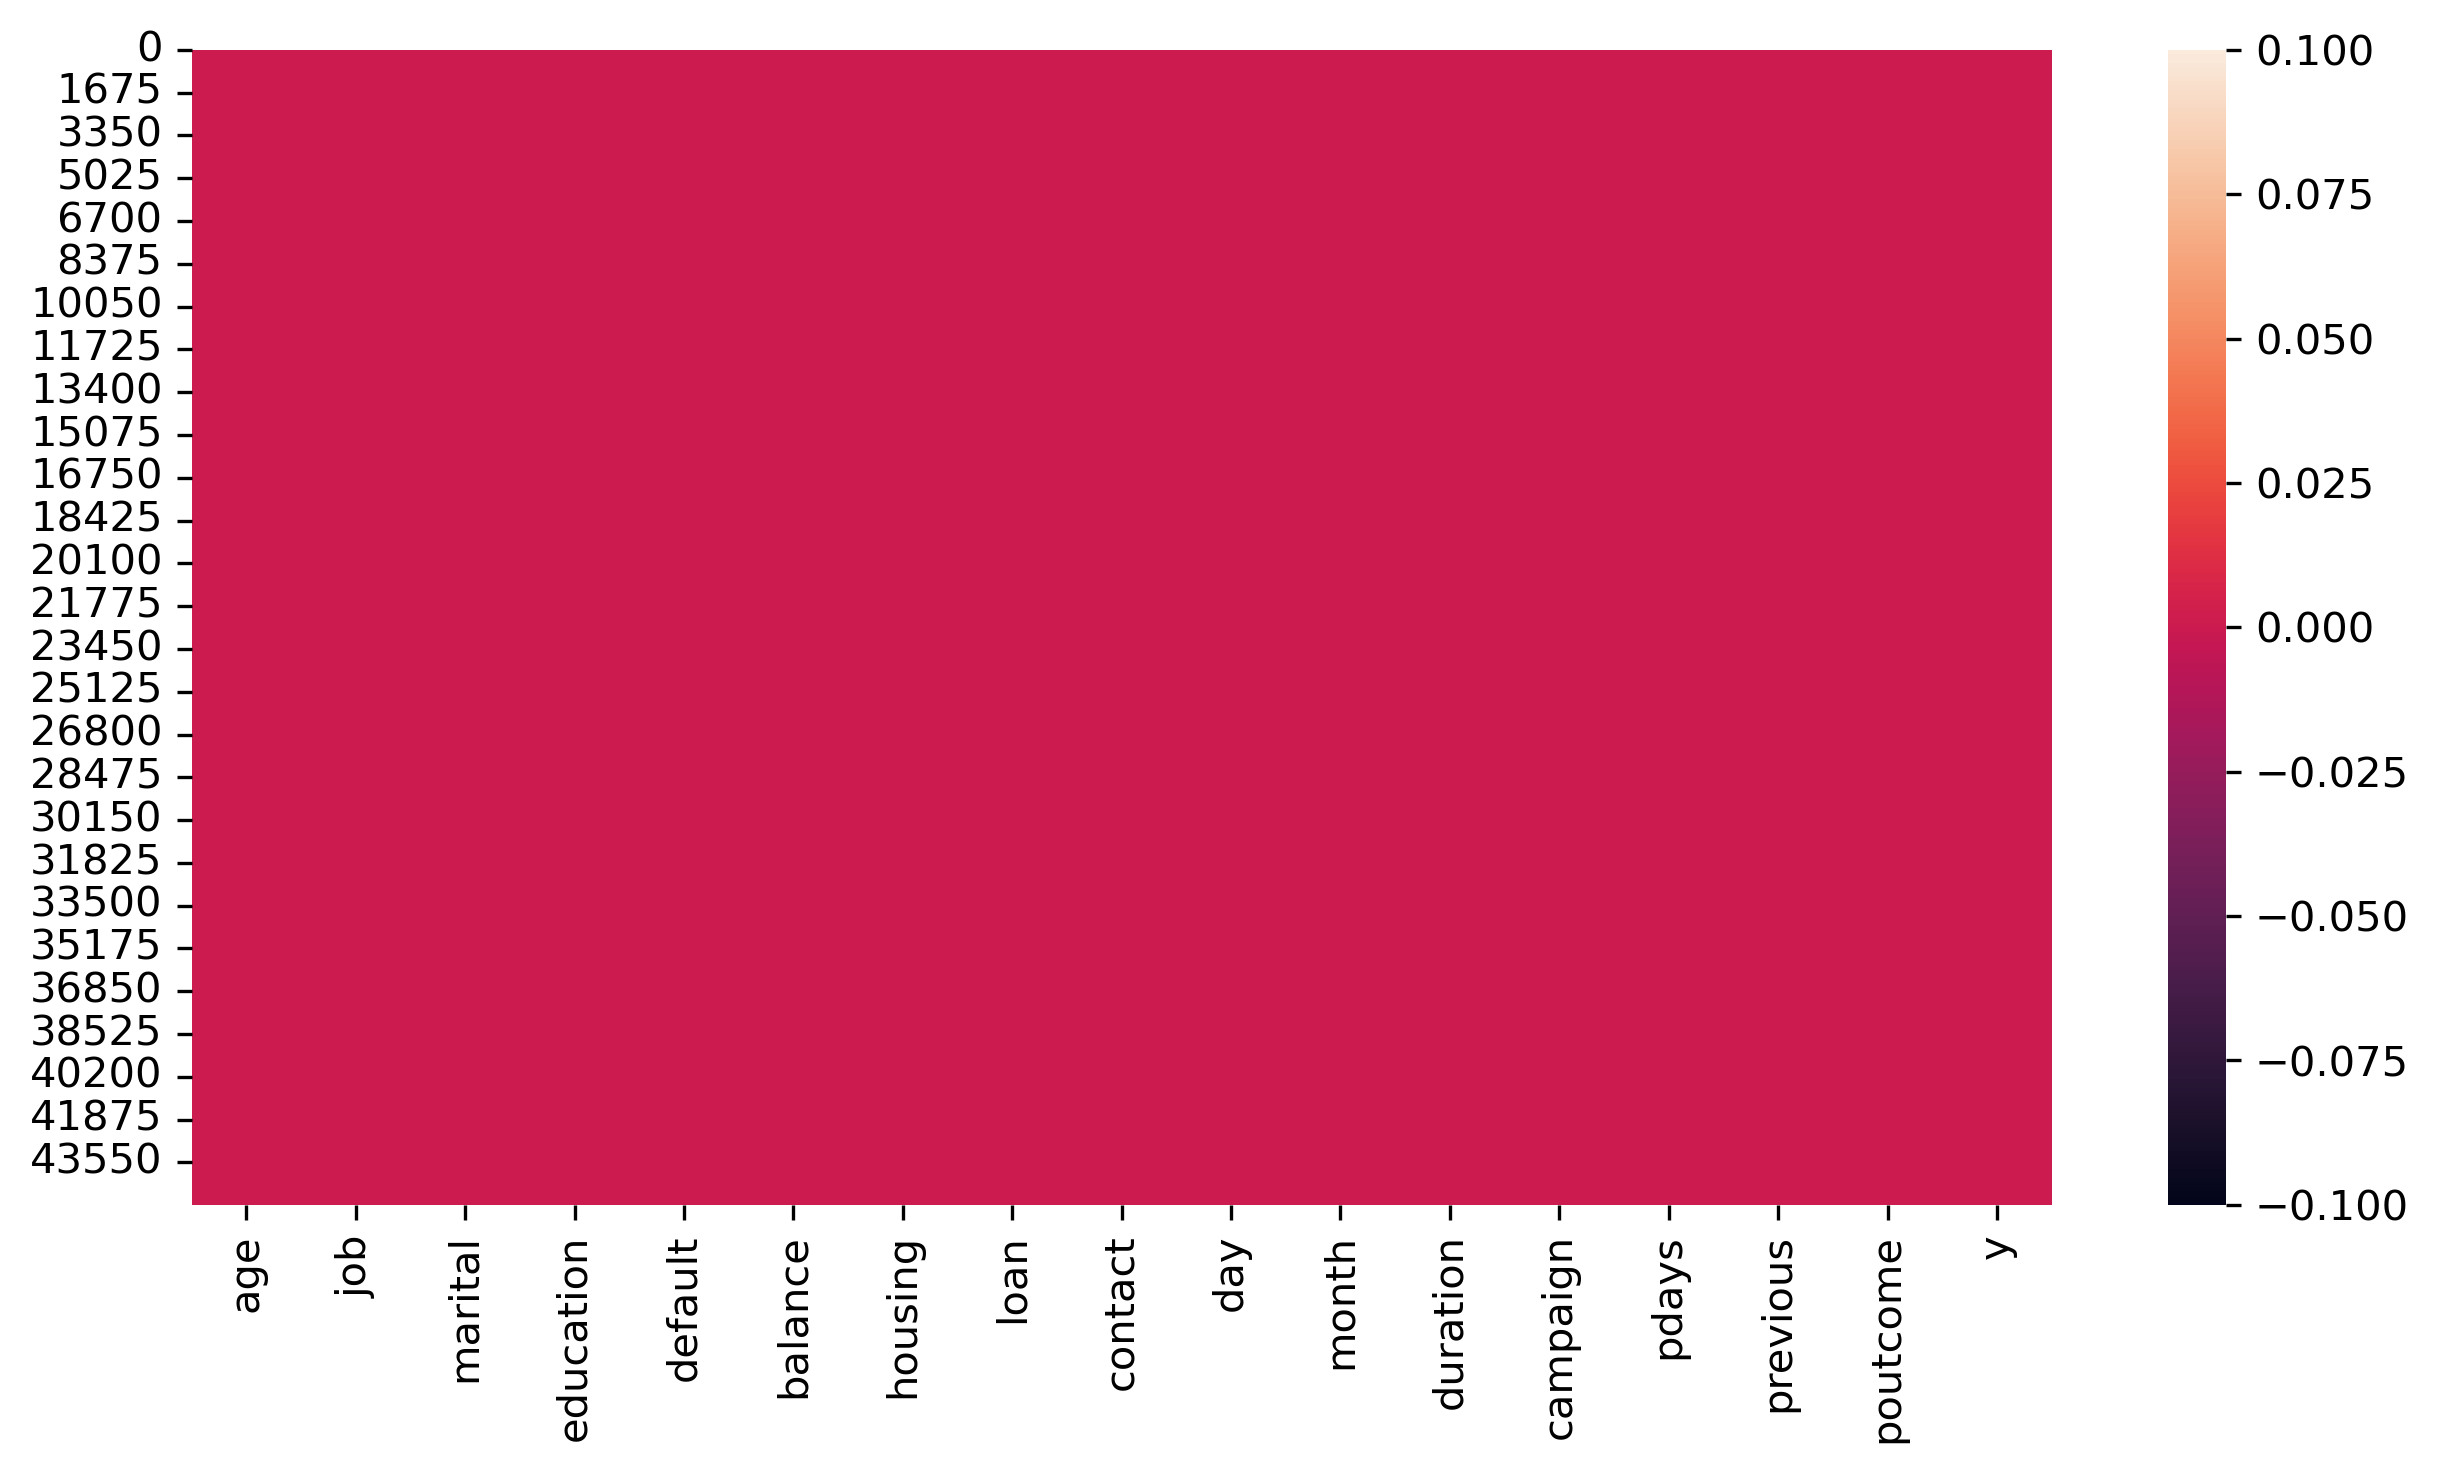

In [25]:
sns.heatmap(data.isna())

In [26]:
sns.set_theme(style = 'darkgrid',palette = 'viridis')

<Axes: >

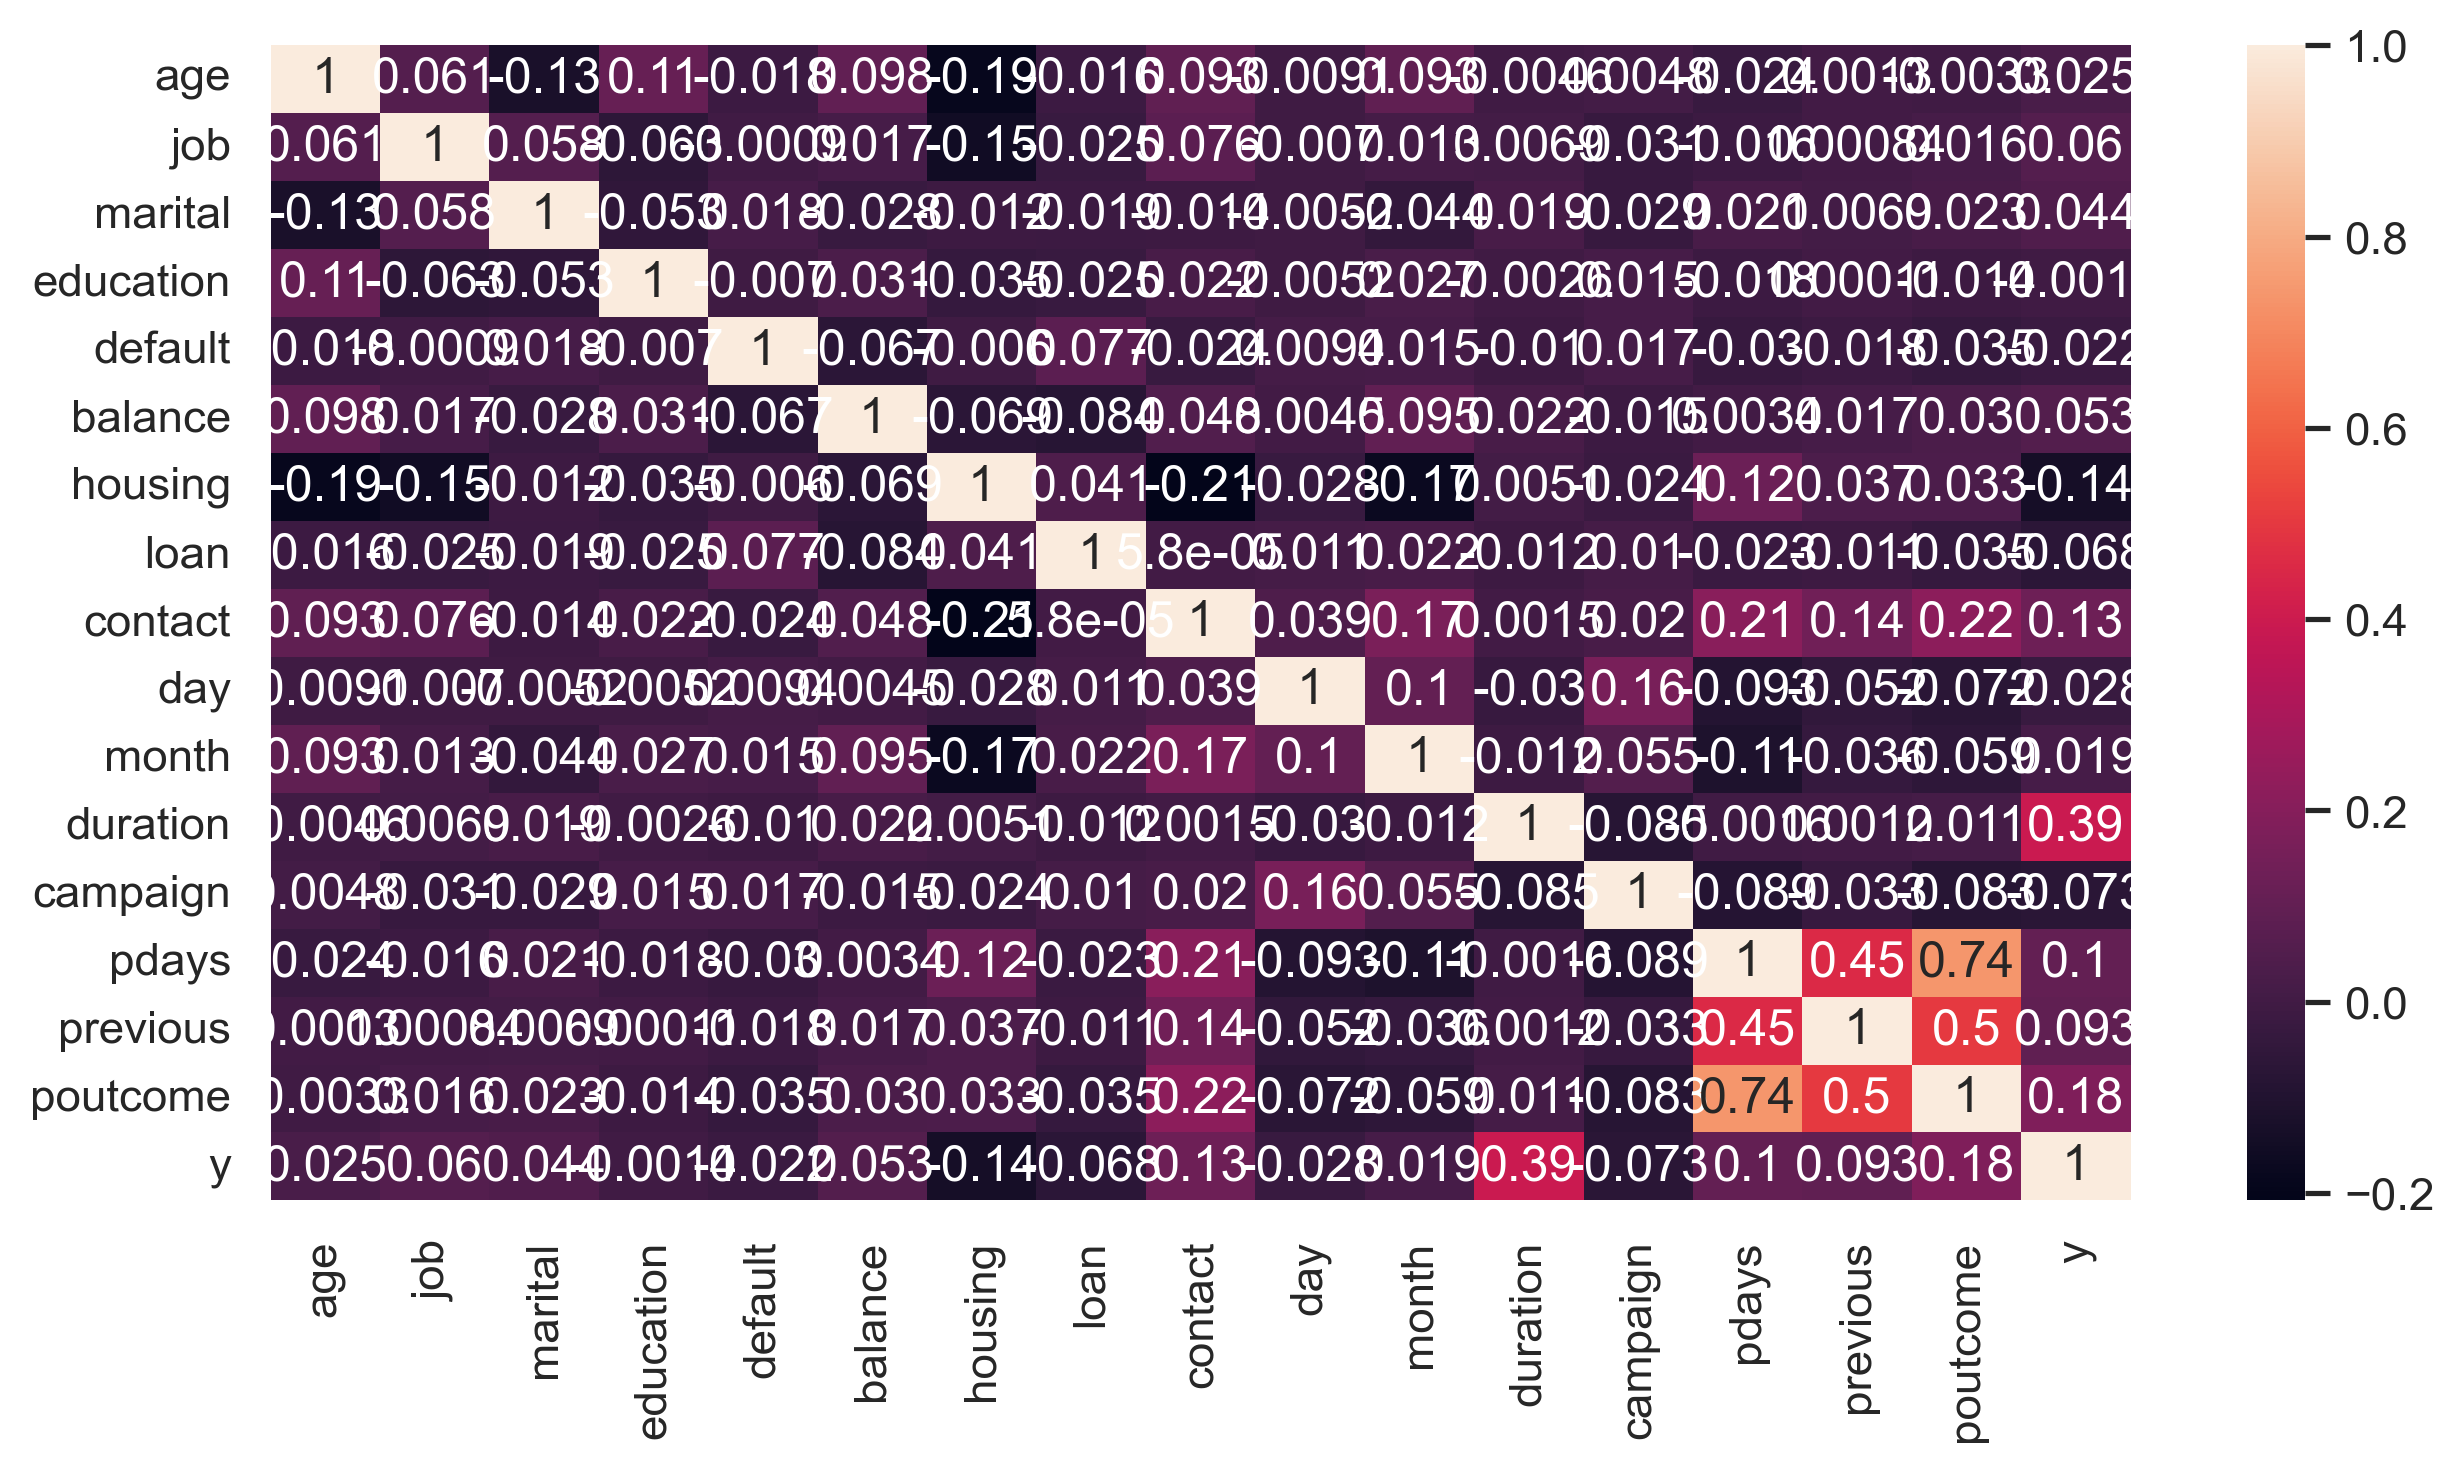

In [27]:
sns.heatmap(data.corr(),annot=True)

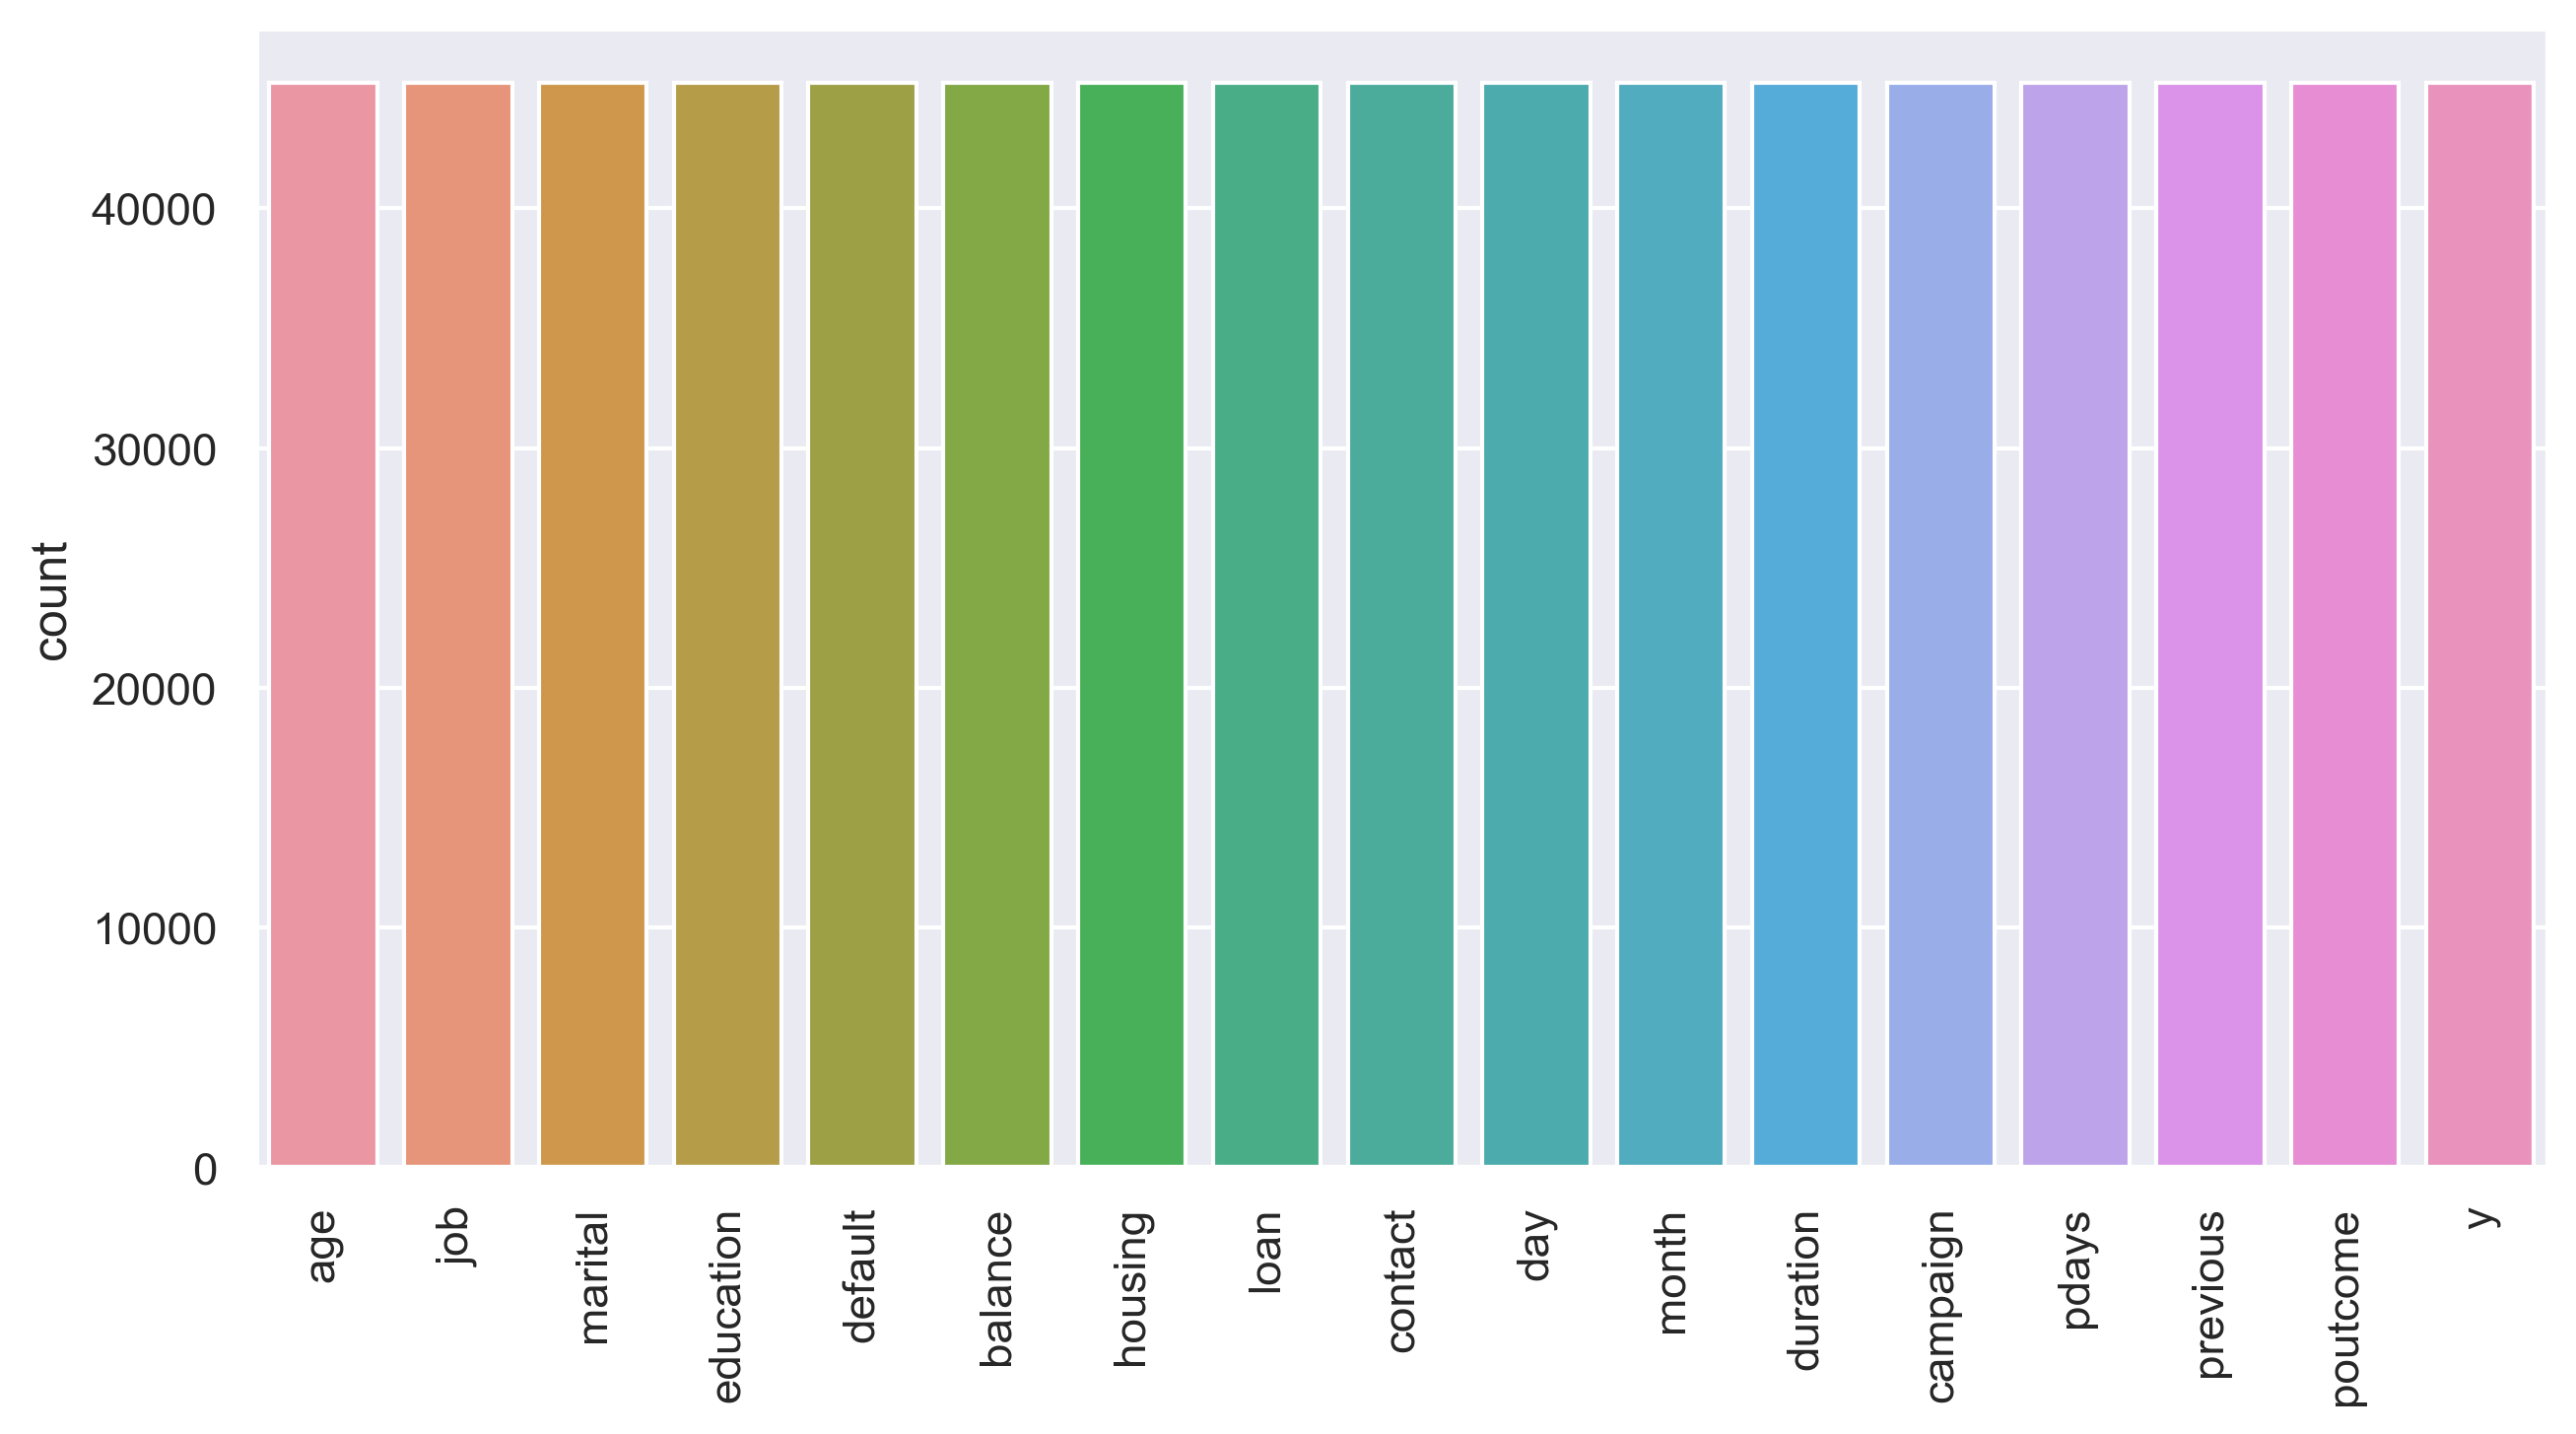

In [33]:
sns.countplot(data)
plt.xticks(rotation = 90)
plt.show()

In [29]:
data.shape

(45211, 17)

<Axes: xlabel='duration', ylabel='Count'>

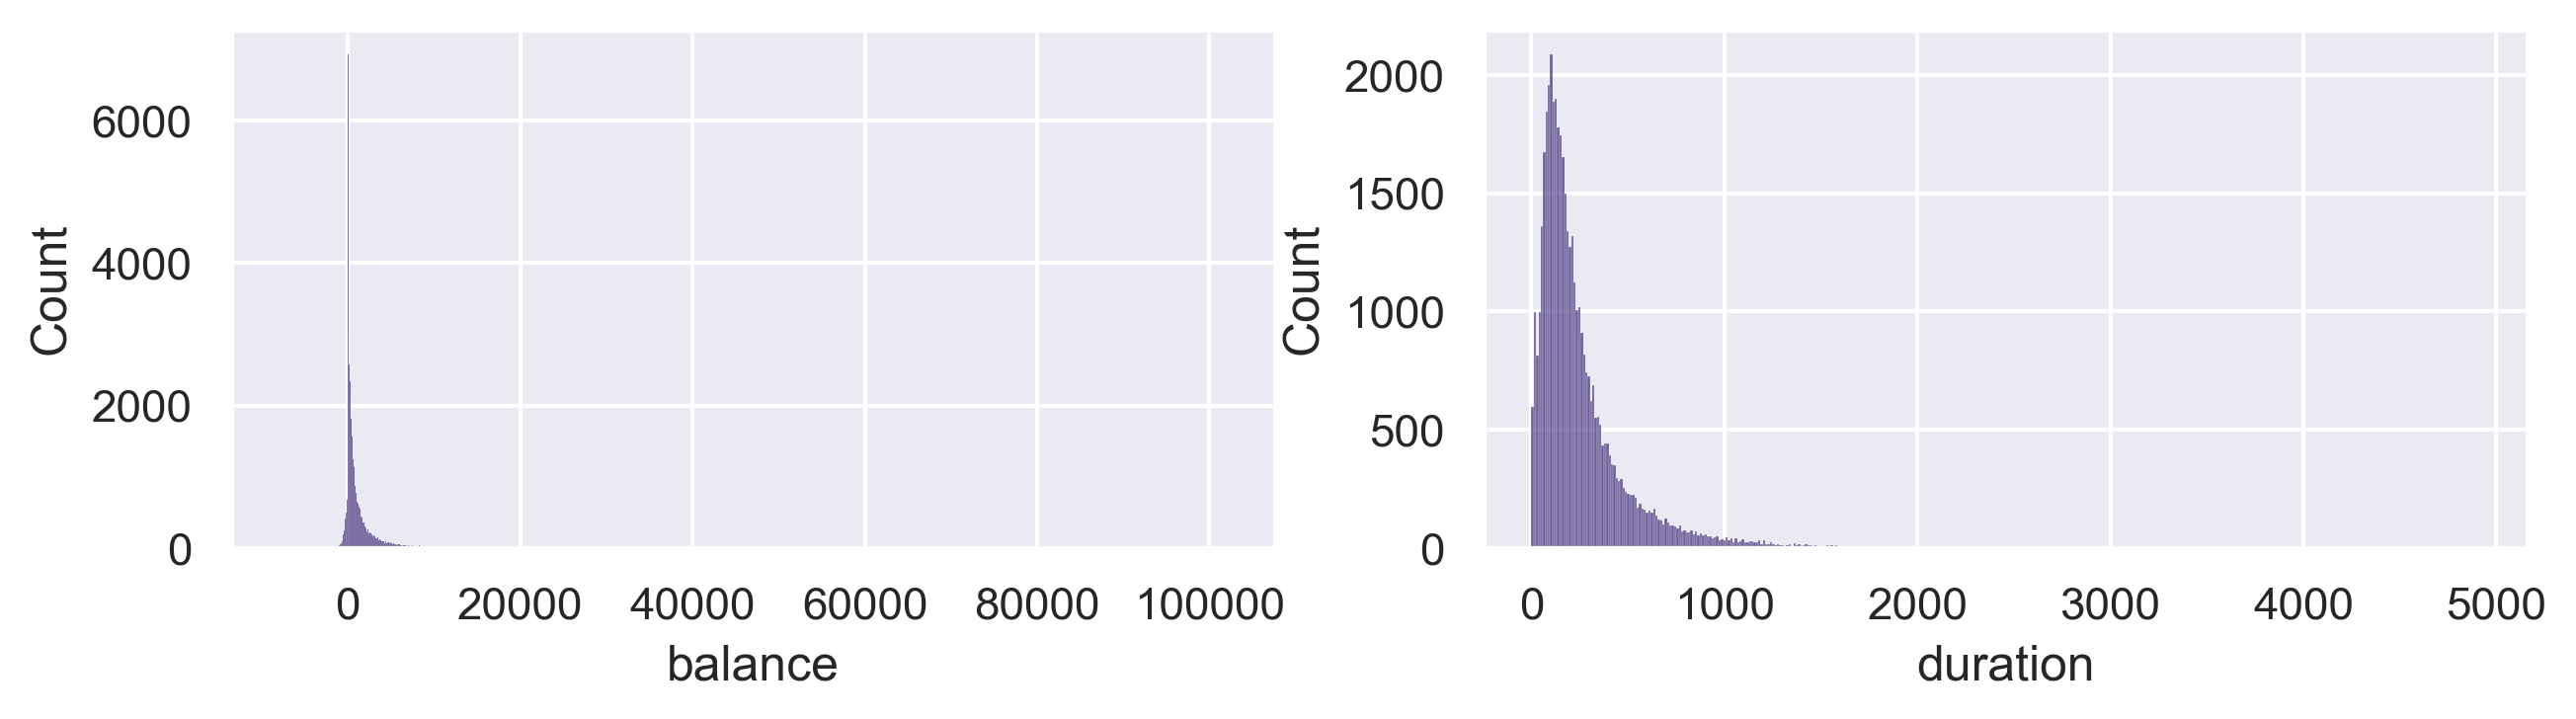

In [35]:
plt.subplot(2,2,1)
sns.histplot(x = data['balance'])

plt.subplot(2,2,2)
sns.histplot(x = data['duration'])

# Model Building

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
x = data.drop(columns=['y'])
y = data['y']

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [42]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score

In [44]:
confusion_matrix(ytest,ypred)

array([[9729,  221],
       [1083,  270]], dtype=int64)

<Axes: >

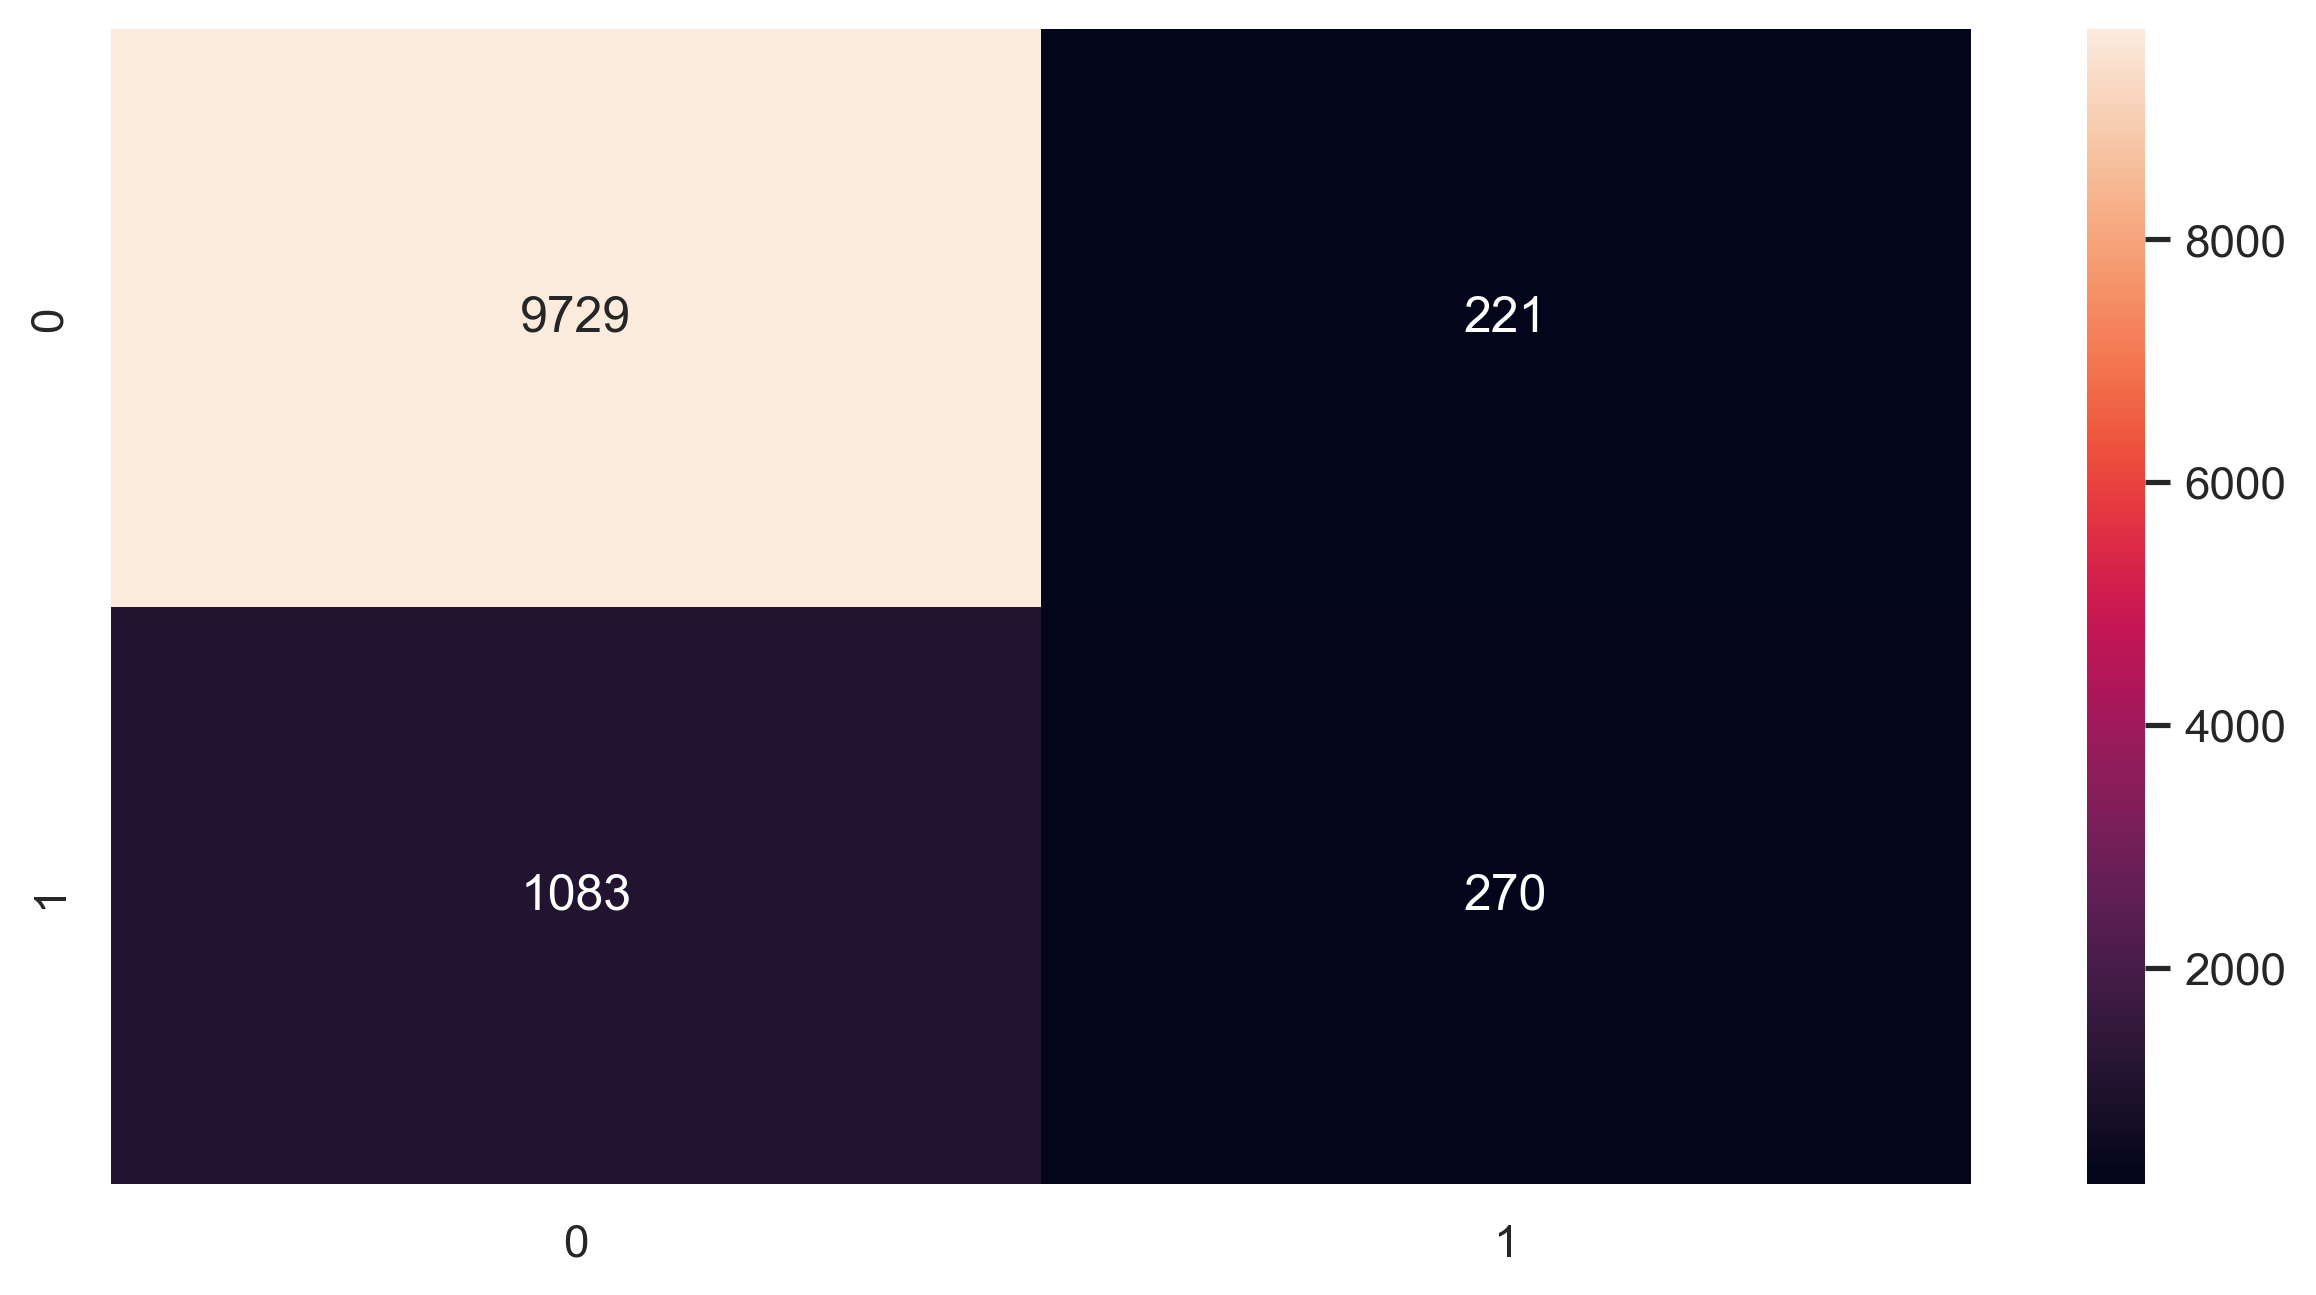

In [46]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt = 'g')

In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9950
           1       0.55      0.20      0.29      1353

    accuracy                           0.88     11303
   macro avg       0.72      0.59      0.62     11303
weighted avg       0.86      0.88      0.86     11303



In [52]:
lg.score(xtrain,ytrain),lg.score(xtest,ytest)

(0.8889642562227204, 0.8846323984782801)

In [57]:
proba = lg.predict(xtest)

In [58]:
auc = roc_auc_score(ytest,proba)
auc

0.5886727428717868

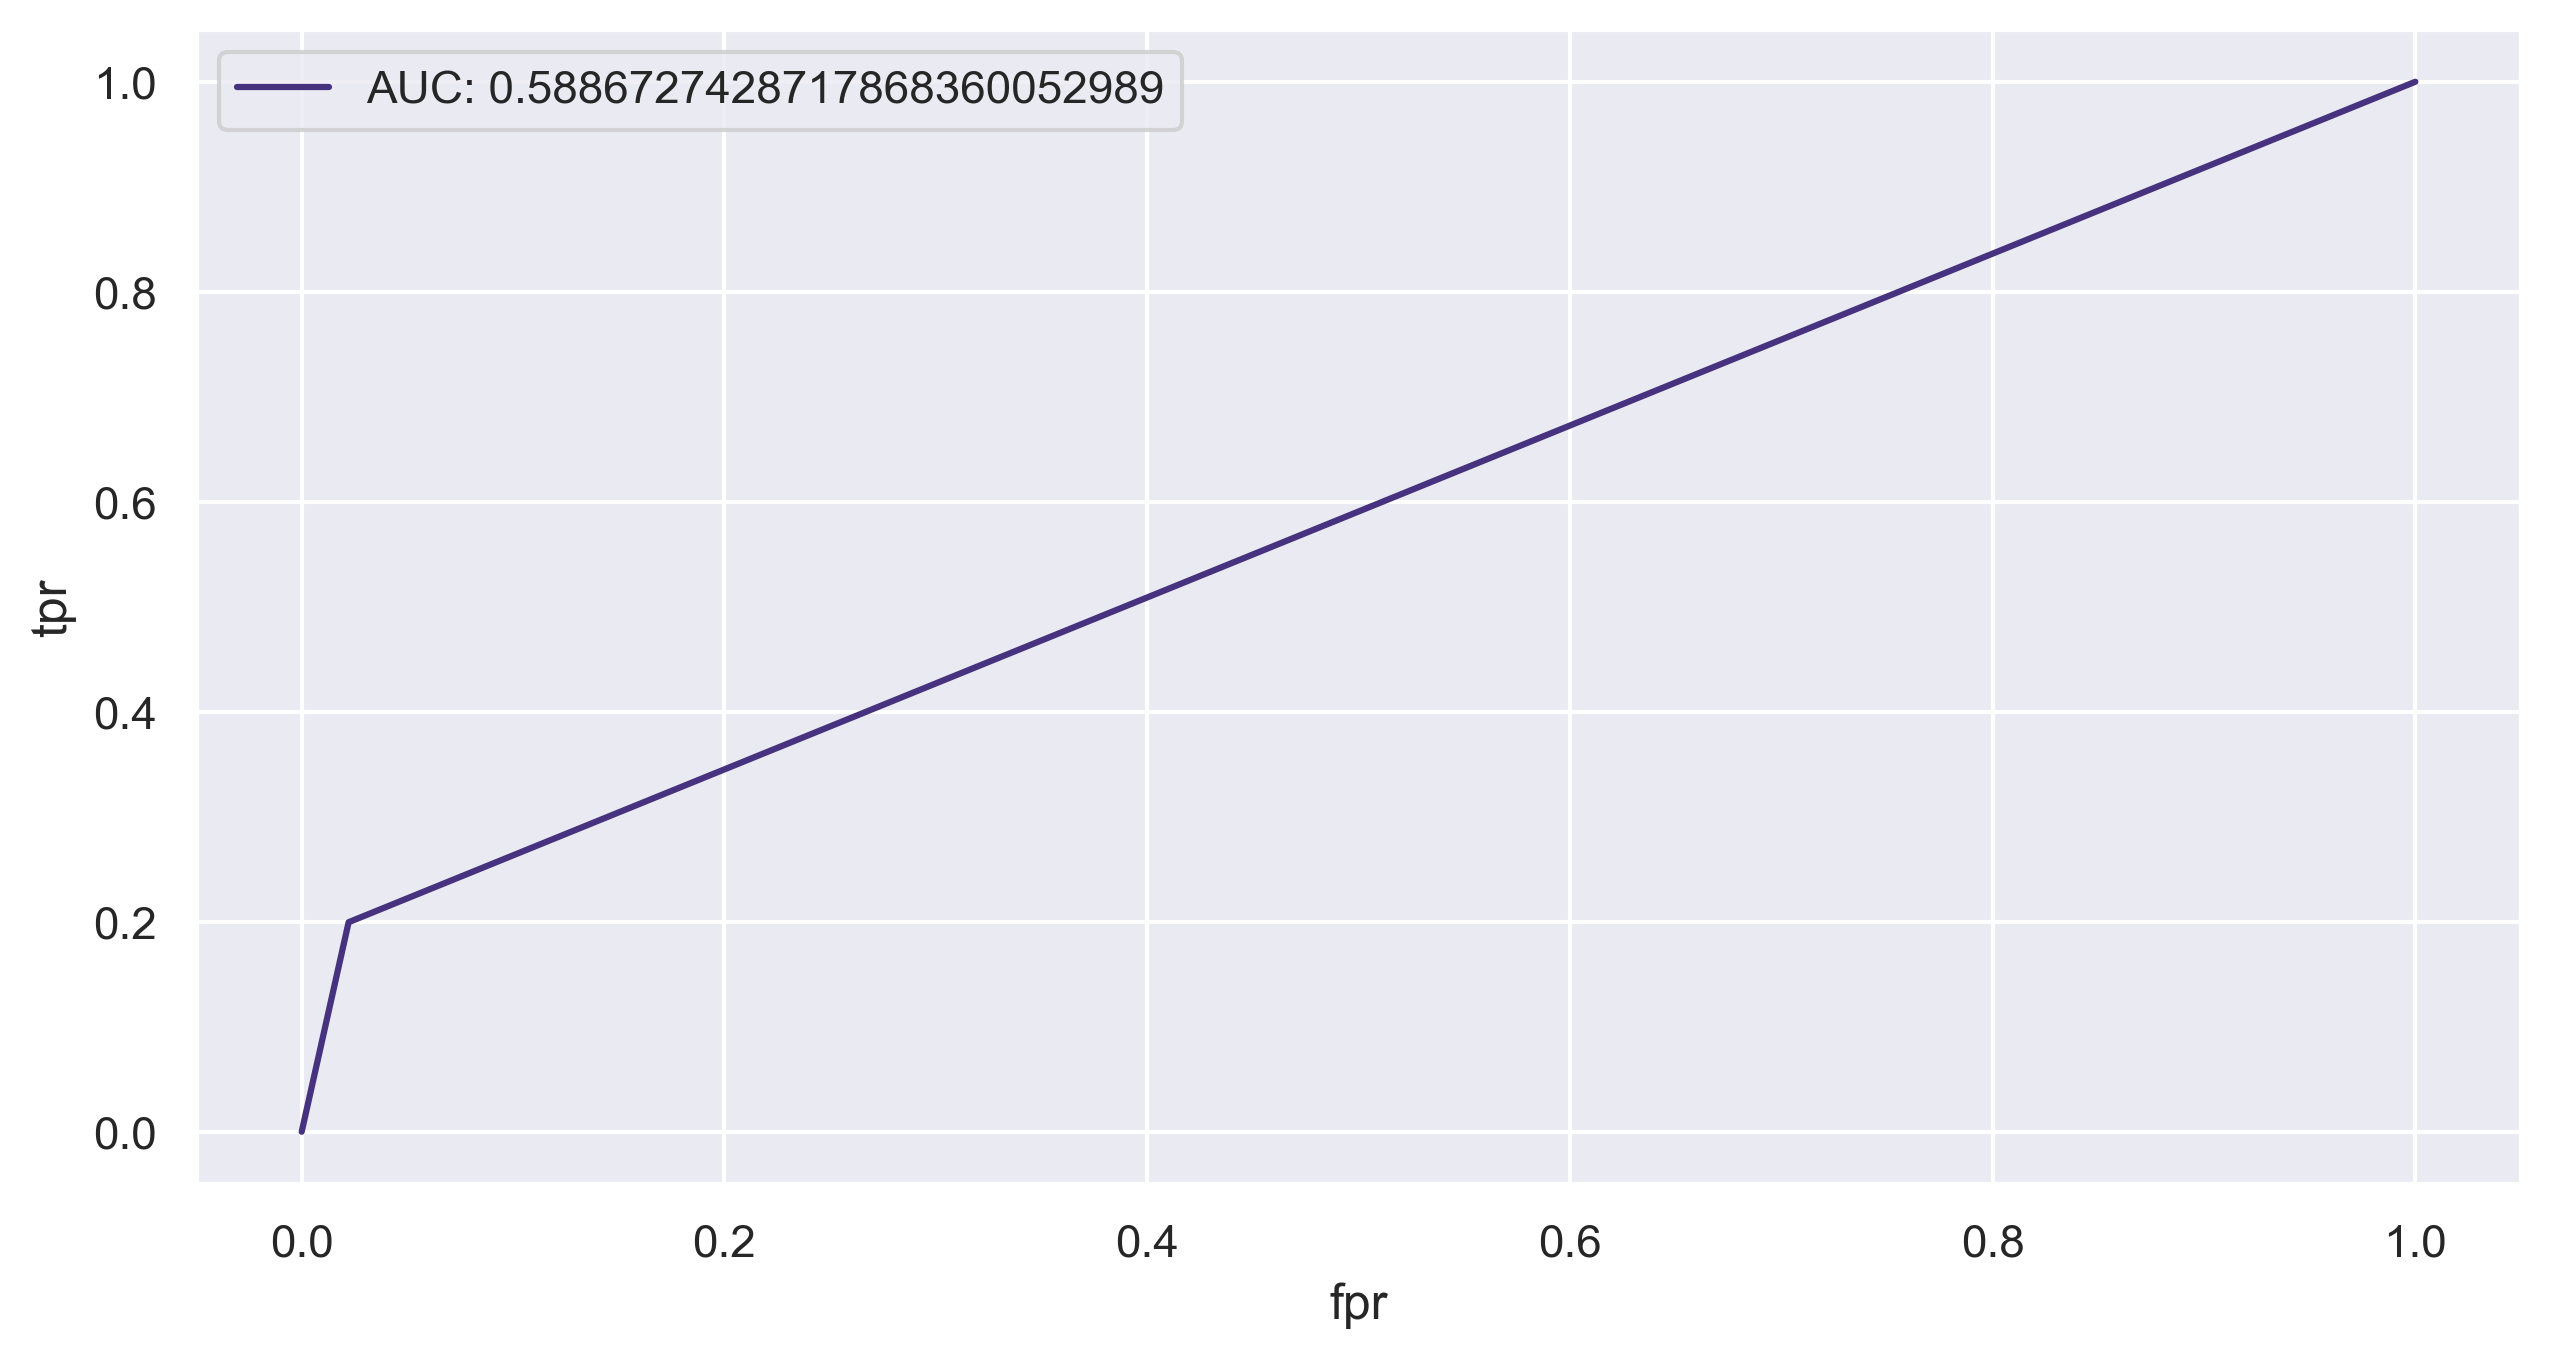

In [59]:
fpr,tpr,threshold = roc_curve(ytest,proba)



plt.plot(fpr,tpr,label = 'AUC: %0.25f'%auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

In [60]:
proba[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [61]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,i,0)
    accuracy.append(accuracy_score(ytest,ypred))
    
    
accuracy

[0.8802972662125099, 0.8802972662125099, 0.8802972662125099]

In [62]:
threshold_selection = pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' : accuracy
})

threshold_selection

,Threshold,Accuracy
0,2,0.880297
1,1,0.880297
2,0,0.880297


In [63]:
from sklearn.preprocessing import binarize

In [65]:
new_pred = binarize([proba],threshold = 0.880297)[0]
new_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
print(classification_report(ytest,new_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9950
           1       0.55      0.20      0.29      1353

    accuracy                           0.88     11303
   macro avg       0.72      0.59      0.62     11303
weighted avg       0.86      0.88      0.86     11303

